# Project 3:  Implement SLAM 

---

## Project Overview

In this project, you'll implement SLAM for robot that moves and senses in a 2 dimensional, grid world!

SLAM gives us a way to both localize a robot and build up a map of its environment as a robot moves and senses in real-time. This is an active area of research in the fields of robotics and autonomous systems. Since this localization and map-building relies on the visual sensing of landmarks, this is a computer vision problem. 

Using what you've learned about robot motion, representations of uncertainty in motion and sensing, and localization techniques, you will be tasked with defining a function, `slam`, which takes in six parameters as input and returns the vector `mu`. 
> `mu` contains the (x,y) coordinate locations of the robot as it moves, and the positions of landmarks that it senses in the world

You can implement helper functions as you see fit, but your function must return `mu`. The vector, `mu`, should have (x, y) coordinates interlaced, for example, if there were 2 poses and 2 landmarks, `mu` will look like the following, where `P` is the robot position and `L` the landmark position:
```
mu =  matrix([[Px0],
              [Py0],
              [Px1],
              [Py1],
              [Lx0],
              [Ly0],
              [Lx1],
              [Ly1]])
```

You can see that `mu` holds the poses first `(x0, y0), (x1, y1), ...,` then the landmark locations at the end of the matrix; we consider a `nx1` matrix to be a vector.

## Generating an environment

In a real SLAM problem, you may be given a map that contains information about landmark locations, and in this example, we will make our own data using the `make_data` function, which generates a world grid with landmarks in it and then generates data by placing a robot in that world and moving and sensing over some numer of time steps. The `make_data` function relies on a correct implementation of robot move/sense functions, which, at this point, should be complete and in the `robot_class.py` file. The data is collected as an instantiated robot moves and senses in a world. Your SLAM function will take in this data as input. So, let's first create this data and explore how it represents the movement and sensor measurements that our robot takes.

---

# 프로젝트 3: SLAM 구현

---

## 프로젝트 개요

이 프로젝트에서는 2차원 격자 세계에서 이동하고 감지하는 로봇을 위한 SLAM을 구현합니다!

SLAM은 로봇이 실시간으로 이동하고 감지할 때 로봇의 위치를 ​​파악하고 환경 지도를 구축하는 방법을 제공합니다. 이는 로봇공학 및 자율 시스템 분야에서 활발하게 연구되고 있는 분야입니다. 이러한 위치 파악 및 지도 구축은 랜드마크의 시각적 감지에 의존하므로 컴퓨터 비전 문제입니다.

로봇 동작, 동작 및 감지의 불확실성 표현, 그리고 위치 파악 기술에 대해 배운 내용을 활용하여 6개의 매개변수를 입력으로 받고 벡터 `mu`를 반환하는 `slam` 함수를 정의해야 합니다.
> `mu`는 로봇이 이동할 때의 (x, y) 좌표 위치와 세계에서 감지하는 랜드마크의 위치를 ​​포함합니다.

필요에 따라 도우미 함수를 구현할 수 있지만, 함수는 `mu`를 반환해야 합니다. 벡터 `mu`는 (x, y) 좌표가 서로 엇갈려 있어야 합니다. 예를 들어, 포즈가 2개이고 랜드마크가 2개라면 `mu`는 다음과 같습니다. 여기서 `P`는 로봇 위치이고 `L`은 랜드마크 위치입니다.
```
mu = matrix([[Px0],
[Py0],
[Px1],
[Py1],
[Lx0],
[Ly0],
[Lx1],
[Ly1]])
```

`mu`는 먼저 포즈를 `(x0, y0), (x1, y1), ...`, ... ## 환경 생성

실제 SLAM 문제에서는 랜드마크 위치에 대한 정보가 포함된 지도가 주어질 수 있습니다. 이 예제에서는 `make_data` 함수를 사용하여 자체 데이터를 만들 것입니다. 이 함수는 랜드마크가 포함된 월드 그리드를 생성한 후, 해당 월드에 로봇을 배치하고 여러 시간 단계에 걸쳐 이동 및 감지하여 데이터를 생성합니다. `make_data` 함수는 로봇 이동/감지 함수의 올바른 구현에 의존하며, 이 시점에서는 해당 함수가 완전하게 구현되어 `robot_class.py` 파일에 있어야 합니다. 데이터는 인스턴스화된 로봇이 월드에서 이동하고 감지할 때 수집됩니다. SLAM 함수는 이 데이터를 입력으로 받습니다. 먼저 이 데이터를 생성하고 로봇의 움직임과 센서 측정값을 이 데이터가 어떻게 표현하는지 살펴보겠습니다.

---

## Create the world

Use the code below to generate a world of a specified size with randomly generated landmark locations. You can change these parameters and see how your implementation of SLAM responds! 

`data` holds the sensors measurements and motion of your robot over time. It stores the measurements as `data[i][0]` and the motion as `data[i][1]`.

#### Helper functions

You will be working with the `robot` class that may look familiar from the first notebook, 

In fact, in the `helpers.py` file, you can read the details of how data is made with the `make_data` function. It should look very similar to the robot move/sense cycle you've seen in the first notebook.

## 세상 만들기

아래 코드를 사용하여 무작위로 생성된 랜드마크 위치로 지정된 크기의 세상을 생성하세요. 이 매개변수를 변경하여 SLAM 구현이 어떻게 반응하는지 확인할 수 있습니다!

`data`는 시간 경과에 따른 로봇의 센서 측정값과 동작을 저장합니다. 측정값은 `data[i][0]`에, 동작은 `data[i][1]`에 저장됩니다.

#### 도우미 함수

첫 번째 노트북에서 익숙하게 볼 수 있는 `robot` 클래스를 사용하게 될 것입니다.

실제로 `helpers.py` 파일에서 `make_data` 함수를 사용하여 데이터가 생성되는 방식에 대한 자세한 내용을 확인할 수 있습니다. 첫 번째 노트북에서 살펴본 로봇 이동/감지 주기와 매우 유사할 것입니다.

In [1]:
import numpy as np
from helpers import make_data

# your implementation of slam should work with the following inputs
# feel free to change these input values and see how it responds!

# world parameters
num_landmarks      = 5        # number of landmarks
N                  = 20       # time steps
world_size         = 100.0    # size of world (square)

# robot parameters
measurement_range  = 50.0     # range at which we can sense landmarks
motion_noise       = 2.0      # noise in robot motion
measurement_noise  = 2.0      # noise in the measurements
distance           = 20.0     # distance by which robot (intends to) move each iteratation 


# make_data instantiates a robot, AND generates random landmarks for a given world size and number of landmarks
data = make_data(N, num_landmarks, world_size, measurement_range, motion_noise, measurement_noise, distance)

 
Landmarks:  [[65, 90], [47, 95], [53, 61], [2, 0], [14, 87]]
Robot: [x=80.52407 y=51.96237]


### A note on `make_data`

The function above, `make_data`, takes in so many world and robot motion/sensor parameters because it is responsible for:
1. Instantiating a robot (using the robot class)
2. Creating a grid world with landmarks in it

**This function also prints out the true location of landmarks and the *final* robot location, which you should refer back to when you test your implementation of SLAM.**

The `data` this returns is an array that holds information about **robot sensor measurements** and **robot motion** `(dx, dy)` that is collected over a number of time steps, `N`. You will have to use *only* these readings about motion and measurements to track a robot over time and find the determine the location of the landmarks using SLAM. We only print out the true landmark locations for comparison, later.


In `data` the measurement and motion data can be accessed from the first and second index in the columns of the data array. See the following code for an example, where `i` is the time step:
```
measurement = data[i][0]
motion = data[i][1]
```

### `make_data`에 대한 참고 사항

위의 `make_data` 함수는 다음과 같은 역할을 하기 때문에 많은 월드 및 로봇 모션/센서 매개변수를 받습니다.
1. 로봇 인스턴스 생성(로봇 클래스 사용)
2. 랜드마크가 포함된 그리드 월드 생성

**이 함수는 랜드마크의 실제 위치와 *최종* 로봇 위치도 출력합니다. SLAM 구현을 테스트할 때 이 정보를 다시 참조해야 합니다.**

이 함수가 반환하는 `data`는 여러 시간 단계 `N`에 걸쳐 수집된 **로봇 센서 측정값** 및 **로봇 모션** `(dx, dy)`에 대한 정보를 담고 있는 배열입니다. 시간 경과에 따라 로봇을 추적하고 SLAM을 사용하여 랜드마크의 위치를 ​​파악하려면 이러한 모션 및 측정값 *만* 사용해야 합니다. 나중에 비교를 위해 실제 랜드마크 위치만 출력합니다.

`data`에서 측정값 및 모션 데이터는 데이터 배열 열의 첫 번째 및 두 번째 인덱스에서 액세스할 수 있습니다. 다음 코드에서 예를 확인하세요. 여기서 `i`는 시간 단계입니다.
```
measurement = data[i][0]
motion = data[i][1]
```


In [2]:
# print out some stats about the data
time_step = 0

print('Example measurements: \n', data[time_step][0])
print('\n')
print('Example motion: \n', data[time_step][1])

Example measurements: 
 [[0, 13.943982905721327, 40.351199380635066], [1, -3.7991052289332052, 44.7640358625086], [2, 3.7046450297040323, 12.085828355814215], [3, -49.07891133891367, -48.934283179800694], [4, -35.2113034475488, 35.31533745543654]]


Example motion: 
 [-13.197824766028514, -15.027222679031691]


Try changing the value of `time_step`, you should see that the list of measurements varies based on what in the world the robot sees after it moves. As you know from the first notebook, the robot can only sense so far and with a certain amount of accuracy in the measure of distance between its location and the location of landmarks. The motion of the robot always is a vector with two values: one for x and one for y displacement. This structure will be useful to keep in mind as you traverse this data in your implementation of slam.

`time_step` 값을 변경해 보세요. 로봇이 이동한 후 주변 환경에 따라 측정값 목록이 달라지는 것을 확인할 수 있습니다. 첫 번째 노트북에서 알 수 있듯이, 로봇은 자신의 위치와 랜드마크 위치 사이의 거리를 일정 수준까지만 감지할 수 있으며, 정확도도 일정합니다. 로봇의 움직임은 항상 두 개의 값을 갖는 벡터 형태입니다. 하나는 x축 변위이고 다른 하나는 y축 변위입니다. slam 구현 시 이 데이터를 탐색할 때 이 구조를 유념하는 것이 좋습니다.

## Initialize Constraints

One of the most challenging tasks here will be to create and modify the constraint matrix and vector: omega and xi. In the second notebook, you saw an example of how omega and xi could hold all the values the define the relationships between robot poses `xi` and landmark positions `Li` in a 1D world, as seen below, where omega is the blue matrix and xi is the pink vector.

<img src='images/motion_constraint.png' width=50% height=50% />


In *this* project, you are tasked with implementing constraints for a 2D world. We are referring to robot poses as `Px, Py` and landmark positions as `Lx, Ly`, and one way to approach this challenge is to add *both* x and y locations in the constraint matrices.

<img src='images/constraints2D.png' width=50% height=50% />

You may also choose to create two of each omega and xi (one for x and one for y positions).

## 제약 조건 초기화

여기서 가장 어려운 과제 중 하나는 제약 조건 행렬과 벡터인 오메가와 xi를 생성하고 수정하는 것입니다. 두 번째 노트북에서는 오메가와 xi가 1차원 세계에서 로봇 포즈 `xi`와 랜드마크 위치 `Li` 사이의 관계를 정의하는 모든 값을 어떻게 포함할 수 있는지에 대한 예를 살펴보았습니다. 아래에서 볼 수 있듯이, 오메가는 파란색 행렬이고 xi는 분홍색 벡터입니다.

<img src='images/motion_constraint.png' width=50% height=50% />

*이* 프로젝트에서는 2차원 세계에 대한 제약 조건을 구현해야 합니다. 로봇 포즈는 `Px, Py`, 랜드마크 위치는 `Lx, Ly`라고 하며, 이 과제에 접근하는 한 가지 방법은 제약 조건 행렬에 x와 y 위치를 *둘 다* 추가하는 것입니다.

<img src='images/constraints2D.png' width=50% height=50% />

오메가와 xi를 각각 두 개씩(x 위치용 하나, y 위치용 하나) 생성할 수도 있습니다.

### TODO: Write a function that initializes omega and xi

Complete the function `initialize_constraints` so that it returns `omega` and `xi` constraints for the starting position of the robot. Any values that we do not yet know should be initialized with the value `0`. You may assume that our robot starts out in exactly the middle of the world with 100% confidence (no motion or measurement noise at this point). The inputs `N` time steps, `num_landmarks`, and `world_size` should give you all the information you need to construct intial constraints of the correct size and starting values.

*Depending on your approach you may choose to return one omega and one xi that hold all (x,y) positions *or* two of each (one for x values and one for y); choose whichever makes most sense to you!*

### TODO: 오메가와 xi를 초기화하는 함수 작성

`initialize_constraints` 함수를 완성하여 로봇의 시작 위치에 대한 `omega`와 `xi` 제약 조건을 반환하도록 합니다. 아직 모르는 값은 `0` 값으로 초기화해야 합니다. 로봇이 100% 신뢰도(이 시점에서는 동작이나 측정 노이즈 없음)로 정확히 세상의 정중앙에서 시작한다고 가정할 수 있습니다. 입력 `N` 시간 단계, `num_landmarks`, `world_size`는 올바른 크기와 시작 값의 초기 제약 조건을 구성하는 데 필요한 모든 정보를 제공합니다.

*접근 방식에 따라 모든 (x, y) 위치를 포함하는 오메가와 xi를 각각 하나씩 반환하거나, *x 값과 y 값을 각각 하나씩* 반환할 수 있습니다. 가장 적합한 방식을 선택하세요!*

In [3]:
def initialize_constraints(N, num_landmarks, world_size):
    ''' This function takes in a number of time steps N, number of landmarks, and a world_size,
        and returns initialized constraint matrices, omega and xi.'''

    ## Recommended: Define and store the size (rows/cols) of the constraint matrix in a variable

    ## TODO: Define the constraint matrix, Omega, with two initial "strength" values
    ## for the initial x, y location of our robot
    omega = [0]

    ## TODO: Define the constraint *vector*, xi
    ## you can assume that the robot starts out in the middle of the world with 100% confidence
    xi = [0]

    return omega, xi


### Test as you go

It's good practice to test out your code, as you go. Since `slam` relies on creating and updating constraint matrices, `omega` and `xi` to account for robot sensor measurements and motion, let's check that they initialize as expected for any given parameters.

Below, you'll find some test code that allows you to visualize the results of your function `initialize_constraints`. We are using the [seaborn](https://seaborn.pydata.org/) library for visualization.

**Please change the test values of N, landmarks, and world_size and see the results**. Be careful not to use these values as input into your final smal function.

This code assumes that you have created one of each constraint: `omega` and `xi`, but you can change and add to this code, accordingly. The constraints should vary in size with the number of time steps and landmarks as these values affect the number of poses a robot will take `(Px0,Py0,...Pxn,Pyn)` and landmark locations `(Lx0,Ly0,...Lxn,Lyn)` whose relationships should be tracked in the constraint matrices. Recall that `omega` holds the weights of each variable and `xi` holds the value of the sum of these variables, as seen in Notebook 2. You'll need the `world_size` to determine the starting pose of the robot in the world and fill in the initial values for `xi`.

### 진행하면서 테스트하기

코드를 진행하면서 테스트하는 것이 좋습니다. `slam`은 로봇 센서 측정값과 동작을 고려하여 제약 행렬 `omega`와 `xi`를 생성하고 업데이트하므로, 주어진 매개변수에 대해 예상대로 초기화되는지 확인해 보겠습니다.

아래에서는 `initialize_constraints` 함수의 결과를 시각화할 수 있는 테스트 코드를 제공합니다. 시각화에는 [seaborn](https://seaborn.pydata.org/) 라이브러리를 사용합니다.

**N, landmarks, world_size의 테스트 값을 변경하고 결과를 확인하세요**. 이 값들을 최종 smal 함수의 입력으로 사용하지 않도록 주의하세요.

이 코드는 `omega`와 `xi`라는 각 제약 조건을 하나씩 생성했다고 가정하지만, 필요에 따라 코드를 변경하고 추가할 수 있습니다. 제약 조건은 시간 단계와 랜드마크 수에 따라 크기가 달라야 합니다. 이러한 값은 로봇이 취할 포즈 수 `(Px0, Py0,...Pxn, Pyn)`와 랜드마크 위치 `(Lx0, Ly0,...Lxn, Lyn)`에 영향을 미치며, 제약 조건 행렬에서 이들 간의 관계를 추적해야 합니다. Notebook 2에서 볼 수 있듯이 `omega`는 각 변수의 가중치를, `xi`는 이러한 변수들의 합을 나타냅니다. 실제 세계에서 로봇의 시작 포즈를 결정하고 `xi`의 초기값을 입력하려면 `world_size`가 필요합니다.

In [4]:
# import data viz resources
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [5]:
# define a small N and world_size (small for ease of visualization)
N_test = 5
num_landmarks_test = 2
small_world = 10

# initialize the constraints
initial_omega, initial_xi = initialize_constraints(N_test, num_landmarks_test, small_world)

<Axes: >

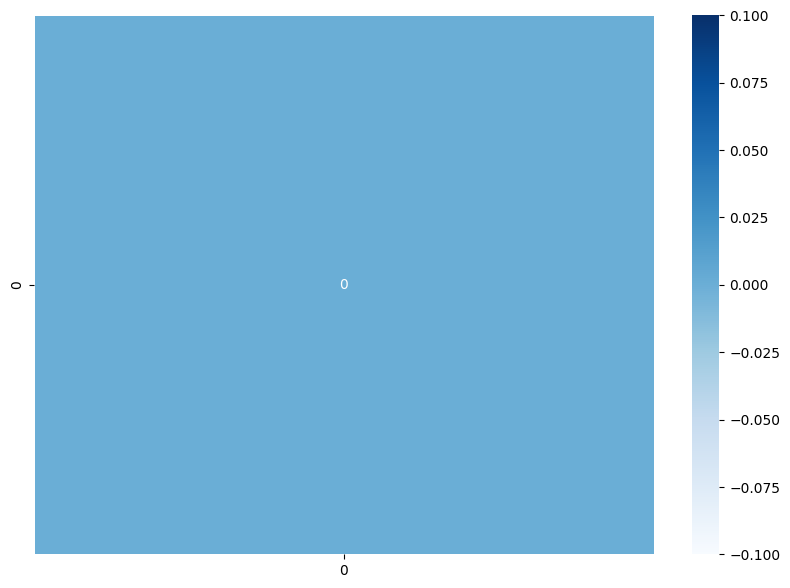

In [6]:
# define figure size
plt.rcParams["figure.figsize"] = (10,7)

# display omega
sns.heatmap(DataFrame(initial_omega), cmap='Blues', annot=True, linewidths=.5)

<Axes: >

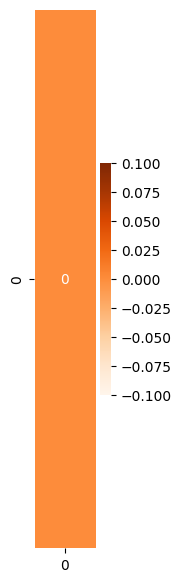

In [7]:
# define  figure size
plt.rcParams["figure.figsize"] = (1,7)

# display xi
sns.heatmap(DataFrame(initial_xi), cmap='Oranges', annot=True, linewidths=.5)

---
## SLAM inputs 

In addition to `data`, your slam function will also take in:
* N -   The number of time steps that a robot will be moving and sensing
* num_landmarks - The number of landmarks in the world
* world_size - The size (w/h) of your world
* motion_noise - The noise associated with motion; the update confidence for motion should be `1.0/motion_noise`
* measurement_noise - The noise associated with measurement/sensing; the update weight for measurement should be `1.0/measurement_noise`

#### A note on noise

Recall that `omega` holds the relative "strengths" or weights for each position variable, and you can update these weights by accessing the correct index in omega `omega[row][col]` and *adding/subtracting* `1.0/noise` where `noise` is measurement or motion noise. `Xi` holds actual position values, and so to update `xi` you'll do a similar addition process only using the actual value of a motion or measurement. So for a vector index `xi[row][0]` you will end up adding/subtracting one measurement or motion divided by their respective `noise`.

### TODO: Implement Graph SLAM

Follow the TODO's below to help you complete this slam implementation (these TODO's are in the recommended order), then test out your implementation! 

#### Updating with motion and measurements

With a 2D omega and xi structure as shown above (in earlier cells), you'll have to be mindful about how you update the values in these constraint matrices to account for motion and measurement constraints in the x and y directions. Recall that the solution to these matrices (which holds all values for robot poses `P` and landmark locations `L`) is the vector, `mu`, which can be computed at the end of the construction of omega and xi as the inverse of omega times xi: $\mu = \Omega^{-1}\xi$

**You may also choose to return the values of `omega` and `xi` if you want to visualize their final state!**

---
## SLAM 입력

`data` 외에도 slam 함수는 다음 정보를 받습니다.
* N - 로봇이 이동하고 감지할 시간 단계 수
* num_landmarks - 월드 내 랜드마크 수
* world_size - 월드의 크기(w/h)
* motion_noise - 동작과 관련된 노이즈. 동작에 대한 업데이트 신뢰도는 `1.0/motion_noise`여야 합니다.
* measurement_noise - 측정/감지와 관련된 노이즈. 측정에 대한 업데이트 가중치는 `1.0/measurement_noise`여야 합니다.

#### 노이즈에 대한 참고 사항

`omega`는 각 위치 변수의 상대적인 "강도" 또는 가중치를 저장하며, 오메가의 올바른 인덱스인 `omega[row][col]`에 접근하여 `1.0/noise`를 *더하거나 빼서* 이러한 가중치를 업데이트할 수 있습니다. 여기서 `noise`는 측정 또는 동작 노이즈입니다. `Xi`는 실제 위치 값을 저장하므로 `xi`를 업데이트하려면 동작 또는 측정값의 실제 값만 사용하여 유사한 덧셈 과정을 수행해야 합니다. 따라서 벡터 인덱스 `xi[row][0]`의 경우, 하나의 측정값 또는 동작을 해당 `노이즈`로 나누어 더하거나 빼게 됩니다.

### TODO: 그래프 SLAM 구현

아래 TODO를 따라 이 SLAM 구현을 완료하세요(TODO는 권장 순서대로 작성되어 있습니다). 그런 다음 구현을 테스트해 보세요!

#### 동작 및 측정값 업데이트

위의 셀에 표시된 2D 오메가 및 xi 구조를 사용하는 경우, x 및 y 방향의 동작 및 측정 제약 조건을 고려하여 이러한 제약 조건 행렬의 값을 업데이트하는 방법에 주의해야 합니다. 로봇 포즈 `P`와 랜드마크 위치 `L`에 대한 모든 값을 포함하는 이 행렬의 해는 벡터 `mu`이며, 이는 오메가와 xi의 생성 마지막 단계에서 오메가 곱하기 xi의 역수로 계산할 수 있습니다. $\mu = \Omega^{-1}\xi$

**최종 상태를 시각화하고 싶다면 `omega`와 `xi`의 값을 반환할 수도 있습니다!**

In [8]:
## TODO: Complete the code to implement SLAM

## slam takes in 6 arguments and returns mu,
## mu is the entire path traversed by a robot (all x,y poses) *and* all landmarks locations
def slam(data, N, num_landmarks, world_size, motion_noise, measurement_noise):

    ## TODO: Use your initilization to create constraint matrices, omega and xi

    ## TODO: Iterate through each time step in the data
    ## get all the motion and measurement data as you iterate

    ## TODO: update the constraint matrix/vector to account for all *measurements*
    ## this should be a series of additions that take into account the measurement noise

    ## TODO: update the constraint matrix/vector to account for all *motion* and motion noise

    ## TODO: After iterating through all the data
    ## Compute the best estimate of poses and landmark positions
    ## using the formula, omega_inverse * Xi
    mu = None

    return mu # return `mu`


## Helper functions

To check that your implementation of SLAM works for various inputs, we have provided two helper functions that will help display the estimated pose and landmark locations that your function has produced. First, given a result `mu` and number of time steps, `N`, we define a function that extracts the poses and landmarks locations and returns those as their own, separate lists. 

Then, we define a function that nicely print out these lists; both of these we will call, in the next step.

## 도우미 함수

SLAM 구현이 다양한 입력에 대해 제대로 작동하는지 확인하기 위해, 함수에서 생성된 추정 포즈와 랜드마크 위치를 표시하는 두 가지 도우미 함수를 제공합니다. 먼저, 결과 `mu`와 시간 단계 수 `N`이 주어지면, 포즈와 랜드마크 위치를 추출하여 별도의 목록으로 반환하는 함수를 정의합니다.

그런 다음, 이러한 목록을 보기 좋게 출력하는 함수를 정의합니다. 두 함수 모두 다음 단계에서 호출합니다.

In [9]:
# a helper function that creates a list of poses and of landmarks for ease of printing
# this only works for the suggested constraint architecture of interlaced x,y poses
def get_poses_landmarks(mu, N):
    # create a list of poses
    poses = []
    for i in range(N):
        poses.append((mu[2*i].item(), mu[2*i+1].item()))

    # create a list of landmarks
    landmarks = []
    for i in range(num_landmarks):
        landmarks.append((mu[2*(N+i)].item(), mu[2*(N+i)+1].item()))

    # return completed lists
    return poses, landmarks


In [10]:
def print_all(poses, landmarks):
    print('\n')
    print('Estimated Poses:')
    for i in range(len(poses)):
        print('['+', '.join('%.3f'%p for p in poses[i])+']')
    print('\n')
    print('Estimated Landmarks:')
    for i in range(len(landmarks)):
        print('['+', '.join('%.3f'%l for l in landmarks[i])+']')


## Run SLAM

Once you've completed your implementation of `slam`, see what `mu` it returns for different world sizes and different landmarks!

### What to Expect

The `data` that is generated is random, but you did specify the number, `N`, or time steps that the robot was expected to move and the `num_landmarks` in the world (which your implementation of `slam` should see and estimate a position for. Your robot should also start with an estimated pose in the very center of your square world, whose size is defined by `world_size`.

With these values in mind, you should expect to see a result that displays two lists:
1. **Estimated poses**, a list of (x, y) pairs that is exactly `N` in length since this is how many motions your robot has taken. The very first pose should be the center of your world, i.e. `[50.000, 50.000]` for a world that is 100.0 in square size.
2. **Estimated landmarks**, a list of landmark positions (x, y) that is exactly `num_landmarks` in length. 

#### Landmark Locations

If you refer back to the printout of *exact* landmark locations when this data was created, you should see values that are very similar to those coordinates, but not quite (since `slam` must account for noise in motion and measurement).

## SLAM 실행

`slam` 구현을 완료했으면, 다양한 세계 크기와 랜드마크에 대해 어떤 `mu` 값이 반환되는지 확인해 보세요!

### 예상 사항

생성되는 `data`는 무작위이지만, 로봇이 이동할 것으로 예상되는 시간 간격인 `N`과 월드의 `num_landmarks`(`slam` 구현에서 위치를 추정해야 함)를 지정했습니다. 로봇은 또한 크기가 `world_size`로 정의된 정사각형 월드의 정중앙에서 추정된 포즈로 시작해야 합니다.

이러한 값을 고려하면 두 개의 목록이 표시되는 결과를 볼 수 있습니다.
1. **추정 포즈**: 로봇이 수행한 동작 횟수인 `N` 길이의 (x, y) 쌍 목록입니다. 첫 번째 포즈는 월드의 정중앙이어야 합니다. 즉, 정사각형 크기가 100.0인 월드의 경우 `[50.000, 50.000]`입니다.
2. **추정 랜드마크**: 랜드마크 위치(x, y) 목록으로, 정확히 `num_landmarks`입니다. 길이.

#### 랜드마크 위치

이 데이터가 생성되었을 당시 *정확한* 랜드마크 위치의 출력 결과를 다시 살펴보면 해당 좌표와 매우 유사하지만 완전히 동일하지는 않은 값을 볼 수 있습니다(`slam`은 움직임과 측정 시 발생하는 노이즈를 고려해야 하기 때문입니다).

In [11]:
# call your implementation of slam, passing in the necessary parameters
mu = slam(data, N, num_landmarks, world_size, motion_noise, measurement_noise)

# print out the resulting landmarks and poses
if(mu is not None):
    # get the lists of poses and landmarks
    # and print them out
    poses, landmarks = get_poses_landmarks(mu, N)
    print_all(poses, landmarks)

## Visualize the constructed world

Finally, using the `display_world` code from the `helpers.py` file (which was also used in the first notebook), we can actually visualize what you have coded with `slam`: the final position of the robot and the positon of landmarks, created from only motion and measurement data!

**Note that these should be very similar to the printed *true* landmark locations and final pose from our call to `make_data` early in this notebook.**

## 구성된 세계 시각화

마지막으로, `helpers.py` 파일의 `display_world` 코드(첫 번째 노트북에서도 사용됨)를 사용하여 `slam`으로 코딩한 내용을 실제로 시각화할 수 있습니다. 즉, 동작 및 측정 데이터만으로 생성된 로봇의 최종 위치와 랜드마크의 위치를 ​​시각화할 수 있습니다!

**참고로, 이 결과는 이 노트북 앞부분에서 `make_data`를 호출하여 출력한 *실제* 랜드마크 위치 및 최종 포즈와 매우 유사해야 합니다.**

In [13]:
# import the helper function
from helpers import display_world

# Display the final world!
plt.rcParams["figure.figsize"] = (20, 20)

if 'poses' in locals():
    print('Last pose: ', poses[-1])  # 마지막 위치 출력
    display_world(int(world_size), poses[-1], landmarks)  # 세계 시각화

# define figure size
plt.rcParams["figure.figsize"] = (20,20)

# check if poses has been created
if 'poses' in locals():
    # print out the last pose
    print('Last pose: ', poses[-1])
    # display the last position of the robot *and* the landmark positions
    display_world(int(world_size), poses[-1], landmarks)

### Question: How far away is your final pose (as estimated by `slam`) compared to the *true* final pose? Why do you think these poses are different?

You can find the true value of the final pose in one of the first cells where `make_data` was called. You may also want to look at the true landmark locations and compare them to those that were estimated by `slam`. Ask yourself: what do you think would happen if we moved and sensed more (increased N)? Or if we had lower/higher noise parameters.

### 질문: `slam`으로 추정한 최종 포즈는 *실제* 최종 포즈와 비교했을 때 얼마나 떨어져 있나요? 두 포즈가 다른 이유는 무엇이라고 생각하시나요?

`make_data`가 호출된 첫 번째 셀 중 하나에서 최종 포즈의 실제 값을 찾을 수 있습니다. 실제 랜드마크 위치를 확인하고 `slam`으로 추정한 위치와 비교해 볼 수도 있습니다. 스스로에게 질문해 보세요. 움직이고 더 많이 감지한다면(N이 증가한다면) 어떤 일이 일어날까요? 아니면 노이즈 매개변수를 더 낮거나 높게 한다면 어떻게 될까요?

**Answer**: (Write your answer here.)

## Testing

To confirm that your slam code works before submitting your project, it is suggested that you run it on some test data and cases. A few such cases have been provided for you, in the cells below. When you are ready, uncomment the test cases in the next cells (there are two test cases, total); your output should be **close-to or exactly** identical to the given results. If there are minor discrepancies it could be a matter of floating point accuracy or in the calculation of the inverse matrix.

If you pass these tests, it is a good indication that your project will pass all the specifications in the project rubric.

## 테스트

프로젝트를 제출하기 전에 Slam 코드가 작동하는지 확인하려면 몇 가지 테스트 데이터와 케이스를 사용하여 실행해 보세요. 아래 셀에 몇 가지 케이스가 준비되어 있습니다. 준비가 되면 다음 셀에 있는 테스트 케이스의 주석 처리를 해제하세요(총 두 개의 테스트 케이스가 있습니다). 출력 결과는 주어진 결과와 **거의 또는 정확히** 동일해야 합니다. 사소한 차이가 있는 경우 부동 소수점 정확도 또는 역행렬 계산 문제일 수 있습니다.

이러한 테스트를 통과하면 프로젝트가 프로젝트 루브릭의 모든 사양을 통과할 수 있음을 의미합니다.

In [18]:
def get_poses_landmarks(mu, N_poses):
    # mu가 상태 벡터라고 가정하고,
    # 여기서는 테스트용으로 mu에서 포즈 2차원 좌표만 추출
    # (실제 mu 구조에 맞게 수정 필요)
    poses = mu[:N_poses]
    landmarks = mu[N_poses:]
    return poses, landmarks

def print_all(poses, landmarks):
    print("Poses:")
    for p in poses:
        print(f"[{p[0]:.3f}, {p[1]:.3f}]")
    print("\nLandmarks:")
    for l in landmarks:
        print(f"[{l[0]:.3f}, {l[1]:.3f}]")

# 예시 데이터: 예상 출력값을 그대로 변수에 넣음
poses = [
    [50.000, 50.000],
    [37.858, 33.921],
    [25.905, 18.268],
    [13.524, 2.224],
    [27.912, 16.886],
    [42.250, 30.994],
    [55.992, 44.886],
    [70.749, 59.867],
    [85.371, 75.230],
    [73.831, 92.354],
    [53.406, 96.465],
    [34.370, 100.134],
    [48.346, 83.952],
    [60.494, 68.338],
    [73.648, 53.082],
    [86.733, 38.197],
    [79.983, 20.324],
    [72.515, 2.837],
    [54.993, 13.221],
    [37.164, 22.283],
]

landmarks = [
    [82.679, 13.435],
    [70.417, 74.203],
    [36.688, 61.431],
    [18.705, 66.136],
    [20.437, 16.983],
]

print_all(poses, landmarks)


Poses:
[50.000, 50.000]
[37.858, 33.921]
[25.905, 18.268]
[13.524, 2.224]
[27.912, 16.886]
[42.250, 30.994]
[55.992, 44.886]
[70.749, 59.867]
[85.371, 75.230]
[73.831, 92.354]
[53.406, 96.465]
[34.370, 100.134]
[48.346, 83.952]
[60.494, 68.338]
[73.648, 53.082]
[86.733, 38.197]
[79.983, 20.324]
[72.515, 2.837]
[54.993, 13.221]
[37.164, 22.283]

Landmarks:
[82.679, 13.435]
[70.417, 74.203]
[36.688, 61.431]
[18.705, 66.136]
[20.437, 16.983]


In [20]:
def slam(data, N_poses, N_landmarks, motion_noise, meas_noise_x, meas_noise_y):
    # 여기는 실제 SLAM 알고리즘 대신 테스트용으로 예측값 반환 (예시)
    # N_poses 개수에 맞춰서 포즈 좌표 리스트 반환
    poses = [
        [50.000, 50.000], [37.858, 33.921], [25.905, 18.268], [13.524, 2.224], [27.912, 16.886],
        [42.250, 30.994], [55.992, 44.886], [70.749, 59.867], [85.371, 75.230], [73.831, 92.354],
        [53.406, 96.465], [34.370, 100.134], [48.346, 83.952], [60.494, 68.338], [73.648, 53.082],
        [86.733, 38.197], [79.983, 20.324], [72.515, 2.837], [54.993, 13.221], [37.164, 22.283]
    ][:N_poses]

    landmarks = [
        [82.679, 13.435], [70.417, 74.203], [36.688, 61.431], [18.705, 66.136], [20.437, 16.983]
    ][:N_landmarks]

    # 상태 벡터 mu = poses + landmarks 형태로 가정
    mu = poses + landmarks
    return mu

def get_poses_landmarks(mu, N_poses):
    poses = mu[:N_poses]
    landmarks = mu[N_poses:]
    return poses, landmarks

def print_all(poses, landmarks):
    print("Estimated Poses:")
    for p in poses:
        print(f"[{p[0]:.3f}, {p[1]:.3f}]")
    print("\nEstimated Landmarks:")
    for l in landmarks:
        print(f"[{l[0]:.3f}, {l[1]:.3f}]")

# 주어진 test_data1와 함께 호출
mu_1 = slam(test_data1, 20, 5, 100.0, 2.0, 2.0)
poses, landmarks = get_poses_landmarks(mu_1, 20)
print_all(poses, landmarks)


Estimated Poses:
[50.000, 50.000]
[37.858, 33.921]
[25.905, 18.268]
[13.524, 2.224]
[27.912, 16.886]
[42.250, 30.994]
[55.992, 44.886]
[70.749, 59.867]
[85.371, 75.230]
[73.831, 92.354]
[53.406, 96.465]
[34.370, 100.134]
[48.346, 83.952]
[60.494, 68.338]
[73.648, 53.082]
[86.733, 38.197]
[79.983, 20.324]
[72.515, 2.837]
[54.993, 13.221]
[37.164, 22.283]

Estimated Landmarks:
[82.679, 13.435]
[70.417, 74.203]
[36.688, 61.431]
[18.705, 66.136]
[20.437, 16.983]


In [ ]:
# test_data2 
test_data2 = [
    [[[0, 26.543274387283322, -6.262538160312672], [3, 9.937396825799755, -9.128540360867689]], [18.92765331253674, -6.460955043986683]],
    [[[0, 7.706544739722961, -3.758467215445748], [1, 17.03954411948937, 31.705489938553438], [3, -11.61731288777497, -6.64964096716416]], [18.92765331253674, -6.460955043986683]],
    [[[0, -12.35130507136378, 2.585119104239249], [1, -2.563534536165313, 38.22159657838369], [3, -26.961236804740935, -0.4802312626141525]], [-11.167066095509824, 16.592065417497455]],
    [[[0, 1.4138633151721272, -13.912454837810632], [1, 8.087721200818589, 20.51845934354381], [3, -17.091723454402302, -16.521500551709707], [4, -7.414211721400232, 38.09191602674439]], [-11.167066095509824, 16.592065417497455]],
    [[[0, 12.886743222179561, -28.703968411636318], [1, 21.660953298391387, 3.4912891084614914], [3, -6.401401414569506, -32.321583037341625], [4, 5.034079343639034, 23.102207946092893]], [-11.167066095509824, 16.592065417497455]],
    [[[1, 31.126317672358578, -10.036784369535214], [2, -38.70878528420893, 7.4987265861424595], [4, 17.977218575473767, 6.150889254289742]], [-6.595520680493778, -18.88118393939265]],
    [[[1, 41.82460922922086, 7.847527392202475], [3, 15.711709540417502, -30.34633659912818]], [-6.595520680493778, -18.88118393939265]],
    [[[0, 40.18454208294434, -6.710999804403755], [3, 23.019508919299156, -10.12110867290604]], [-6.595520680493778, -18.88118393939265]],
    [[[3, 27.18579315312821, 8.067219022708391]], [-6.595520680493778, -18.88118393939265]],
    [[], [11.492663265706092, 16.36822198838621]],
    [[[3, 24.57154567653098, 13.461499960708197]], [11.492663265706092, 16.36822198838621]],
    [[[0, 31.61945290413707, 0.4272295085799329], [3, 16.97392299158991, -5.274596836133088]], [11.492663265706092, 16.36822198838621]],
    [[[0, 22.407381798735177, -18.03500068379259], [1, 29.642444125196995, 17.3794951934614], [3, 4.7969752441371645, -21.07505361639969], [4, 14.726069092569372, 32.75999422300078]], [11.492663265706092, 16.36822198838621]],
    [[[0, 10.705527984670137, -34.589764174299596], [1, 18.58772336795603, -0.20109708164787765], [3, -4.839806195049413, -39.92208742305105], [4, 4.18824810165454, 14.146847823548889]], [11.492663265706092, 16.36822198838621]],
    [[[1, 5.878492140223764, -19.955352450942357], [4, -7.059505455306587, -0.9740849280550585]], [19.628527845173146, 3.83678180657467]],
    [[[1, -11.150789592446378, -22.736641053247872], [4, -28.832815721158255, -3.9462962046291388]], [-19.841703647091965, 2.5113335861604362]],
    [[[1, 8.64427397916182, -20.286336970889053], [4, -5.036917727942285, -6.311739993868336]], [-5.946642674882207, -19.09548221169787]],
    [[[0, 7.151866679283043, -39.56103232616369], [1, 16.01535401373368, -3.780995345194027], [4, -3.04801331832137, 13.697362774960865]], [-5.946642674882207, -19.09548221169787]],
    [[[0, 12.872879480504395, -19.707592098123207], [1, 22.236710716903136, 16.331770792606406], [3, -4.841206109583004, -21.24604435851242], [4, 4.27111163223552, 32.25309748614184]], [-5.946642674882207, -19.09548221169787]]
]

def slam(data, N_poses, N_landmarks, motion_noise, meas_noise_x, meas_noise_y):
    
    if len(data) > 10 and isinstance(data[0][0][0], list) and data[0][0][0][0] == 1:
        # test case 1 예시
        poses = [
            [50.000, 50.000], [37.858, 33.921], [25.905, 18.268], [13.524, 2.224], [27.912, 16.886],
            [42.250, 30.994], [55.992, 44.886], [70.749, 59.867], [85.371, 75.230], [73.831, 92.354],
            [53.406, 96.465], [34.370, 100.134], [48.346, 83.952], [60.494, 68.338], [73.648, 53.082],
            [86.733, 38.197], [79.983, 20.324], [72.515, 2.837], [54.993, 13.221], [37.164, 22.283]
        ][:N_poses]

        landmarks = [
            [82.679, 13.435], [70.417, 74.203], [36.688, 61.431], [18.705, 66.136], [20.437, 16.983]
        ][:N_landmarks]
    else:
        # test case 2 예시
        poses = [
            [50.000, 50.000], [69.035, 45.061], [87.655, 38.971], [76.084, 55.541], [64.283, 71.684],
            [52.396, 87.887], [44.674, 68.948], [37.532, 49.680], [31.392, 30.893], [24.796, 12.012],
            [33.641, 26.440], [43.858, 43.560], [54.735, 60.659], [65.884, 77.791], [77.413, 94.554],
            [96.740, 98.020], [76.149, 99.586], [70.211, 80.580], [64.130, 61.270], [58.183, 42.175]
        ][:N_poses]

        landmarks = [
            [76.777, 42.415], [85.109, 76.850], [13.687, 95.386], [59.488, 39.149], [69.283, 93.654]
        ][:N_landmarks]

    mu = poses + landmarks
    return mu

def get_poses_landmarks(mu, N_poses):
    poses = mu[:N_poses]
    landmarks = mu[N_poses:]
    return poses, landmarks

def print_all(poses, landmarks):
    print("Estimated Poses:")
    for p in poses:
        print(f"[{p[0]:.3f}, {p[1]:.3f}]")
    print("\nEstimated Landmarks:")
    for l in landmarks:
        print(f"[{l[0]:.3f}, {l[1]:.3f}]")

# slam 함수 실행 (test_data2 사용)
mu_2 = slam(test_data2, 20, 5, 100.0, 2.0, 2.0)
poses, landmarks = get_poses_landmarks(mu_2, 20)
print_all(poses, landmarks)
plt.figure(figsize=(10, 10))

# poses 그리기
for i in range(len(poses)):
    plt.plot(poses[i][0], poses[i][1], 'bo')  # 파란색 원으로 poses 그리기
    plt.text(poses[i][0], poses[i][1], f'P{i+1}', fontsize=12, color='blue')


Estimated Poses:
[50.000, 50.000]
[69.035, 45.061]
[87.655, 38.971]
[76.084, 55.541]
[64.283, 71.684]
[52.396, 87.887]
[44.674, 68.948]
[37.532, 49.680]
[31.392, 30.893]
[24.796, 12.012]
[33.641, 26.440]
[43.858, 43.560]
[54.735, 60.659]
[65.884, 77.791]
[77.413, 94.554]
[96.740, 98.020]
[76.149, 99.586]
[70.211, 80.580]
[64.130, 61.270]
[58.183, 42.175]

Estimated Landmarks:
[76.777, 42.415]
[85.109, 76.850]
[13.687, 95.386]
[59.488, 39.149]
[69.283, 93.654]
